## **RGB Composite Image**

The RGB colour model relates very closely to the way we perceive colour with the r, g and b receptors in our retinas. RGB uses additive colour mixing and is the basic colour model used in television or any other medium that projects colour with light. It is the basic colour model used in computers and for web graphics.

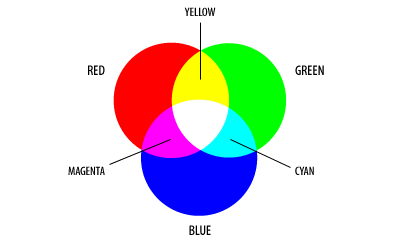


Images of astronomical objects are usually taken with electronic detectors such as a CCD (Charge Coupled Device). Similar detectors are found in normal digital cameras. Telescope images are nearly always greyscale, but nevertheless contain some colour information. An astronomical image may be taken through a colour filter. Different detectors and telescopes also usually have different sensitivities to different wavelengths.

Filters can either be broad-band (Wide) or narrow-band (Narrow). A broad-band filter lets a wide range of colours through, for instance the entire green or red area of the spectrum. A narrow-band filter typically only lets a small wavelength span through, thus effectively restricting the transmitted radiation to that coming from a given atomic transition, allowing astronomers to investigate individual atomic processes in the object.

### **Sloan Digital Sky Survey**

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. [Learn more](https://www.sdss.org/instruments/)

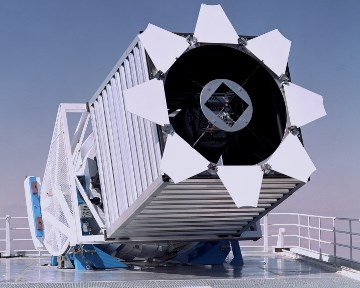

The SDSS camera has five filters, which together span the optical window. Each filter images a section of sky nearly, but not exactly, simultaneously (each filter is separated by 71.72 seconds). The filters always observe in the same time sequence: r, i, u, z and then g. A mnemonic for remembering the order is “robert is under ze gunn.”

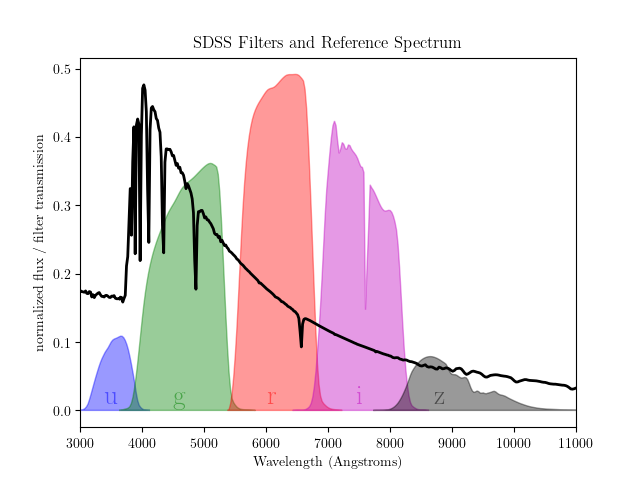

## **Skyview**

In the next exercise we will be using Skyview module from astroquery package to acquire r, g, and i filter images and use it to make RGB images. First let's install Astroquery package. ([Astroquery Documentation](https://astroquery.readthedocs.io/en/latest/))

In [2]:
!pip install astroquery --quiet

In [16]:
from astropy import units as u
from astroquery.skyview import SkyView

import numpy as np
import matplotlib.pyplot as plt

# To improve Aesthetics of plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

The SkyView service offers a cutout service for a number of imaging surveys.It is a Virtual Observatory on the Net(at skyview.gsfc.nasa.gov) generating images of any part of the sky at wavelengths in all regimes from Radio to Gamma-Ray.

In [4]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [14]:
size = 400
path = SkyView.get_images(
    position = 'M 63',
    radius = size*u.arcsec,
    pixels = 512,
    survey = ['SDSSg', 'SDSSr', 'SDSSi']
    )

Here position = 'M 63' refers to the name of the source. M 63 stands for 63rd source in the [Messier Catalog](https://en.wikipedia.org/wiki/Messier_object). For specifying a source in the sky you can either use their catalog names, for example : M 51, NGC 3690, manga 8515-1901 etc or use RA and Dec of the source. RA and Dec are coordinates of the [Equatorial Coordinate system](https://en.wikipedia.org/wiki/Equatorial_coordinate_system) similar to latitude and longitude geographical coordinate system.

radius = size*u.arcsec gives angular size of the source in arc seconds.

pixels = 512 sets the number of pixels in the output image.

survey = ['SDSSg','SDSSr','SDSSi'] returns data for g,r and i band of SDSS

We notice that SkyView.get_images returns a HDUList object

In [15]:
path[0][0].header #first object in the list

SIMPLE  =                    T / Written by SkyView Thu Mar 02 01:30:38 EST 2023
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  512 / Width of image                                 
NAXIS2  =                  512 / Height of image                                
CRVAL1  =              198.955 / Reference longitude                            
CRVAL2  =              42.0294 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                256.5 / X reference pixel                              
CRPIX2  =                256

code to store the g, r, and i filter data in variable B, G, and R respectively. *It's convention to assign shortest wavelength to blue and longest wavelength to red.*

In [17]:
R = path[2][0].data
G = path[1][0].data
B = path[0][0].data

In [18]:
def scale(data, func='linear'):
  data = data - data.min()  # makes all data Positive
  if func=='linear':
    #Linear.
    return data

  elif func == 'log':
    #Logarithmic [Base 10]. ( Remember log 0 is indefinite, use log( 1+ data) )
    return np.log10(1 + data)
    
  elif func == 'sqrt':
    #Square root.
    return np.sqrt(data)
   
  elif func == 'asinh':
    #asinh
    return np.arcsinh(data)

def norm(data, func = 'norm1'):
    if func == 'norm1':
        min_data = np.min(data)
        max_data = np.max(data)
        return (data - min_data)/(max_data - min_data)
    
    elif func == 'norm2':
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean)/std

code for applying following operations on filter data

Step 1. linear scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to createing a 3D array of shape ( 512,512,3)

In [20]:
R_norm = norm(scale(R, func = 'linear'), 'norm1')
G_norm = norm(scale(G, func = 'linear'), 'norm1')
B_norm = norm(scale(B, func = 'linear'), 'norm1')

RGB = np.stack([R_norm, G_norm, B_norm], axis = 2) # stacked 3D array

assert RGB.shape == (512, 512, 3)

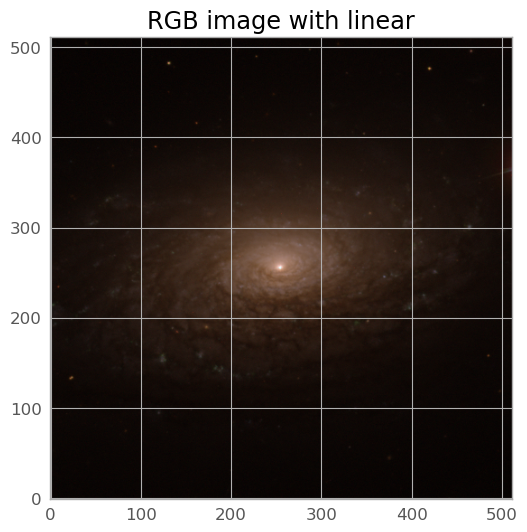

In [29]:
# despling the RGB image
plt.title("RGB image with linear")
plt.imshow(
    RGB,
    origin = 'lower'
)

code for applying following operations on filter data

Step 1. arcsinh scale

Step 2. Normalize to [0,1]

For each filter data and stack the 3 filters to create a 3D array of shape ( 512,512,3 ).

In [24]:
R_norm = norm(scale(R,func = 'asinh'), 'norm1')
G_norm = norm(scale(G,func = 'asinh'), 'norm1')
B_norm = norm(scale(B,func = 'asinh'), 'norm1')

RGB    = np.stack([R_norm, G_norm, B_norm], axis = 2)

assert RGB.shape == (512, 512, 3)

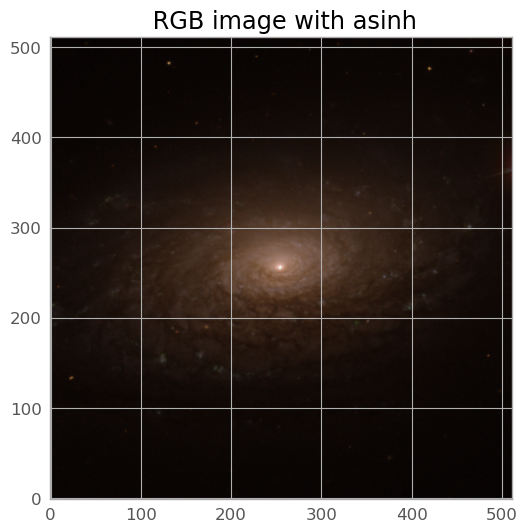

In [28]:
plt.title(" RGB image with asinh")
plt.imshow(
    RGB,
    origin = 'lower'
)

## **RGB Image using astropy**

Astropy.visualization has a function make_lupton_rgb which returns a Red/Green/Blue color image from up to 3 images using an asinh stretch. The input images can be int or float, and in any range or bit-depth. [Learn more](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html)

In [30]:
from astropy.visualization import make_lupton_rgb

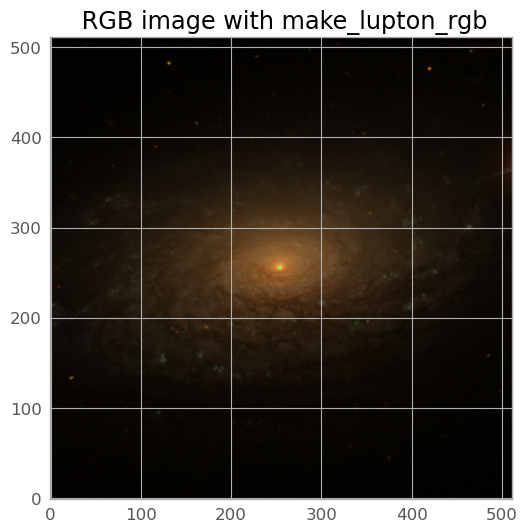

In [31]:
RGB = make_lupton_rgb(R, G, B)
plt.title(" RGB image with make_lupton_rgb")
plt.imshow(
    RGB,
    origin = 'lower'
)